In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

640

In [5]:
# Import our dependencies
# Import the requests library
import requests
# Import the API key
from config import weather_api_key

from datetime import datetime

In [6]:
# Build basic URL for the OpenWeatherMap with weather_api_key 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# Create counters 
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
        
        # Group cities in sets of 50 for logging purposes
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 1
        # Create endpoint URL with each city
        city_url = url + "&q=" + city.replace(" ","+")
        
        # Log the URL, record, and set numbers and the city
        print(f"Processing Record {record_count} of Set {set_count} | {city}")

        # Add 1 to the record count
        record_count += 1

        # Run an API request for each of the cities.
        try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

        # If an error is experienced, skip the city.
        except:
            print("City not found. Skipping...")
            pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | harper
Processing Record 2 of Set 1 | puerto escondido
Processing Record 3 of Set 1 | stornoway
Processing Record 4 of Set 1 | fort nelson
Processing Record 5 of Set 1 | husavik
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | viedma
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | ambilobe
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | henties bay
Processing Record 17 of Set 1 | rutland
Processing Record 18 of Set 1 | borogontsy
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | mabaruma
Processing Record 23 of Set 1 | punta are

Processing Record 38 of Set 4 | bukachacha
Processing Record 39 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 40 of Set 4 | garden city
Processing Record 41 of Set 4 | sembe
Processing Record 42 of Set 4 | daru
Processing Record 43 of Set 4 | makakilo city
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | yevsino
Processing Record 46 of Set 4 | ust-kuyga
Processing Record 47 of Set 4 | laguna
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 50 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 1 of Set 5 | fundacion
Processing Record 2 of Set 5 | fuyang
Processing Record 3 of Set 5 | aksu
Processing Record 4 of Set 5 | owando
Processing Record 5 of Set 5 | mareeba
Processing Record 6 of Set 5 | erenhot
Processing Record 7 of Set 5 | baykit
Processing Record 8 of Set 5 | presidencia roque saenz pena
Processing Record 9 of Set 5 | marcona
City n

Processing Record 25 of Set 8 | tiarei
Processing Record 26 of Set 8 | valdemarpils
Processing Record 27 of Set 8 | goundam
Processing Record 28 of Set 8 | maragogi
Processing Record 29 of Set 8 | iqaluit
Processing Record 30 of Set 8 | koygorodok
Processing Record 31 of Set 8 | cherskiy
Processing Record 32 of Set 8 | carauari
Processing Record 33 of Set 8 | lavumisa
Processing Record 34 of Set 8 | sao felix do xingu
Processing Record 35 of Set 8 | crotone
Processing Record 36 of Set 8 | chino valley
Processing Record 37 of Set 8 | tomatlan
Processing Record 38 of Set 8 | biak
Processing Record 39 of Set 8 | coruripe
Processing Record 40 of Set 8 | sibu
Processing Record 41 of Set 8 | juelsminde
Processing Record 42 of Set 8 | luderitz
Processing Record 43 of Set 8 | inhambane
Processing Record 44 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 45 of Set 8 | waipawa
Processing Record 46 of Set 8 | formosa
Processing Record 47 of Set 8 | yanchukan
City not found.

Processing Record 9 of Set 12 | grand centre
City not found. Skipping...
Processing Record 10 of Set 12 | tulnici
Processing Record 11 of Set 12 | aflu
City not found. Skipping...
Processing Record 12 of Set 12 | wanning
Processing Record 13 of Set 12 | longyearbyen
Processing Record 14 of Set 12 | abu kamal
Processing Record 15 of Set 12 | puerto narino
Processing Record 16 of Set 12 | mount isa
Processing Record 17 of Set 12 | maraba
Processing Record 18 of Set 12 | bangkalan
Processing Record 19 of Set 12 | namatanai
Processing Record 20 of Set 12 | gizo
Processing Record 21 of Set 12 | te anau
Processing Record 22 of Set 12 | moyale
Processing Record 23 of Set 12 | borovichi
Processing Record 24 of Set 12 | namibe
Processing Record 25 of Set 12 | pamulang
Processing Record 26 of Set 12 | moreira sales
Processing Record 27 of Set 12 | namtsy
Processing Record 28 of Set 12 | tahoua
Processing Record 29 of Set 12 | inirida
Processing Record 30 of Set 12 | boa vista
Processing Record 3

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Harper,4.3750,-7.7169,76.87,83,100,6.76,LR,2021-10-26 02:16:32
1,Puerto Escondido,15.8500,-97.0667,83.23,61,75,3.44,MX,2021-10-26 02:16:32
2,Stornoway,58.2093,-6.3865,48.16,87,100,9.22,GB,2021-10-26 02:16:33
3,Fort Nelson,58.8053,-122.7002,29.79,100,90,0.00,CA,2021-10-26 02:15:21
4,Husavik,66.0449,-17.3389,26.51,78,95,7.47,IS,2021-10-26 02:16:33
5,Ushuaia,-54.8000,-68.3000,33.46,93,40,11.50,AR,2021-10-26 02:16:34
6,Port Alfred,-33.5906,26.8910,62.56,87,23,14.43,ZA,2021-10-26 02:16:34
7,Rikitea,-23.1203,-134.9692,75.69,72,62,17.60,PF,2021-10-26 02:16:35
8,Avarua,-21.2078,-159.7750,77.05,61,75,11.50,CK,2021-10-26 02:12:07
9,Constitucion,-35.3333,-72.4167,57.94,77,69,12.71,CL,2021-10-26 02:16:35


In [9]:
# Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Harper,LR,2021-10-26 02:16:32,4.3750,-7.7169,76.87,83,100,6.76
1,Puerto Escondido,MX,2021-10-26 02:16:32,15.8500,-97.0667,83.23,61,75,3.44
2,Stornoway,GB,2021-10-26 02:16:33,58.2093,-6.3865,48.16,87,100,9.22
3,Fort Nelson,CA,2021-10-26 02:15:21,58.8053,-122.7002,29.79,100,90,0.00
4,Husavik,IS,2021-10-26 02:16:33,66.0449,-17.3389,26.51,78,95,7.47
5,Ushuaia,AR,2021-10-26 02:16:34,-54.8000,-68.3000,33.46,93,40,11.50
6,Port Alfred,ZA,2021-10-26 02:16:34,-33.5906,26.8910,62.56,87,23,14.43
7,Rikitea,PF,2021-10-26 02:16:35,-23.1203,-134.9692,75.69,72,62,17.60
8,Avarua,CK,2021-10-26 02:12:07,-21.2078,-159.7750,77.05,61,75,11.50
9,Constitucion,CL,2021-10-26 02:16:35,-35.3333,-72.4167,57.94,77,69,12.71


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

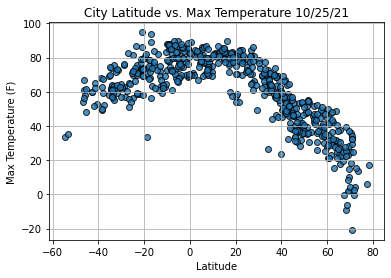

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph propertirs
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig1.png")

# Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

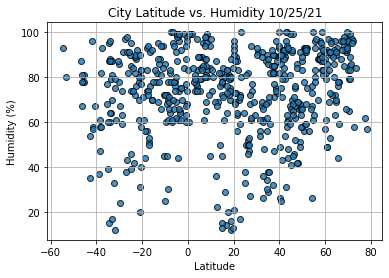

In [14]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph propertirs
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig2.png")

# Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

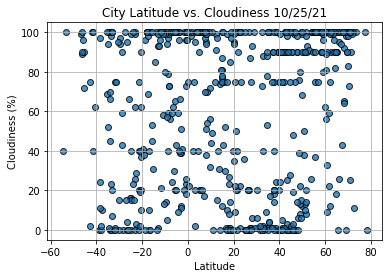

In [15]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph propertirs
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig3.png")

# Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

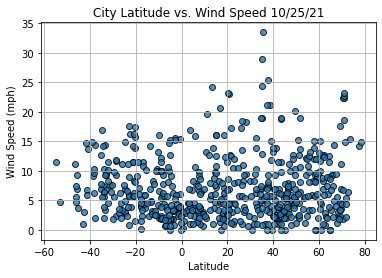

In [16]:
# Build the scatter plot for latitude vs. Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph propertirs
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig4.png")

# Show plot
plt.show